## Language classification
Here we train the classifier to recognize the language of tweets from multiple users. The tweets are in different languages with emojis and hashtags, just like a regualar tweet. Care has been taken to remove punctuations and other characters that might hinder the performance of the classification

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns



In [10]:
dataset = pd.read_csv('dataset1.csv')

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3038 entries, 0 to 3037
Data columns (total 3 columns):
id          3038 non-null int64
text        3038 non-null object
language    3038 non-null object
dtypes: int64(1), object(2)
memory usage: 71.3+ KB


Below plot shows the distribution of different languages in the training set

In [12]:
dataset.language.head()

0           SPA
1      JAPANESE
2    PORTUGUESE
3       ENGLISH
4            EN
Name: language, dtype: object

The emojis, unwanted spaces and other unhelpful characters are removed below

In [13]:

import re
dataset['text'] = dataset['text'].str.replace('[\W]', ' ')
dataset['text'] = dataset['text'].str.replace('[\s+]', ' ')
dataset['text'] = dataset['text'].str.replace('["USER"]', ' ')
test = []
for sen in dataset['text']:    
    doc = re.sub("\d",'',sen)
    doc= re.sub('[\s]+',' ',doc)
    test.append(doc)


X1= test
X1

['Otra fotito porque pues amor W B IT ',
 ' タイタニック号 年に旧航路で出航へ 旅行 歴史 W B IT ',
 'Que o terno nos livre do mal ilumine nosso caminho e nos afaste da iniquidade bomdia fé cristianismo jesuscristo amor salvopelagraça em ão Paulo Brazil W B IT ',
 ' The Beautiful KajalAggarwal Love picoftheday W B IT ',
 ' This is my painting Gazing Along The Hills You can check it out here W B IT art oilpainting contempor ',
 'Die Kunst und der chatten W B IT art artist shadow chatten Kunst Objekt Malerei painting',
 'Negli ultimi anni il cio olato ogni tanto mi porta a Firenze Città di una bellezza da togliere il fiato ',
 ' TAY CALM Would you try this Wild glass bridge in China travel ecotourism adventuretravel via ',
 '世界遺産や重要文化財などが多い奈良県の 室生寺 長谷寺 日本最古の木造建築や ひっそりとして神秘的な景観が特徴的なスポットです W B IT 室生寺 観光 長谷寺 旅行 奈良 日本',
 ' Fragt man mich ob es in meiner Natur sei die onne zu verehren so sage ich abermals Durchaus Denn sie ist gleich ',
 'Meeeeoooooowwww ニャー ニャー W B IT ニャー cat 猫 ねこ meow ネコ にゃんこ にゃんすたぐらむ ねこすたぐらむ ねこ

The training dataset consisted of different codes for the same language. We optimise the code to have a uniform name

In [14]:
dataset['language'] = dataset['language'].apply(lambda spa: 'SPANISH' if spa == 'SPA' else ('SPANISH' if (spa == 'ES') else spa))
dataset['language'] = dataset['language'].apply(lambda eng: 'ENGLISH' if eng == 'EN' else ('ENGLISH' if (eng == 'ENG') else eng))
dataset['language'] = dataset['language'].apply(lambda jap: 'JAPANESE' if jap == 'JA' else ('JAPANESE' if (jap == 'JAP') else jap))
dataset['language'] = dataset['language'].apply(lambda por: 'PORTUGUESE' if por == 'PT' else ('PORTUGUESE' if (por == 'POR') else por))
dataset['language'] = dataset['language'].apply(lambda ger: 'GERMAN' if ger == 'DE' else ('GERMAN' if (ger == 'GER') else ger))
dataset['language'] = dataset['language'].apply(lambda fre: 'FRENCH' if fre == 'FR' else ('FRENCH' if (fre == 'FRA') else fre))
dataset['language'] = dataset['language'].apply(lambda ita: 'ITALIAN' if ita == 'IT' else ('ITALIAN' if (ita == 'ITA') else ita))

y = dataset['language']
dataset.language.unique()


array(['SPANISH', 'JAPANESE', 'PORTUGUESE', 'ENGLISH', 'GERMAN',
       'ITALIAN', 'FRENCH'], dtype=object)

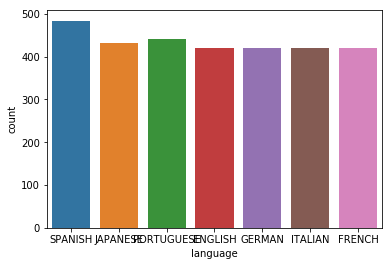

In [15]:
sns.countplot(x='language', data=dataset);

This can be done with both Count Vectorizer and TfIdf vectorizer.
TfIdf gives better accuracy.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer###increased performance marginally
tfidfconverter = TfidfVectorizer(max_features=5000)
X1 = tfidfconverter.fit_transform(X1).toarray()


The training dataset is split into train,test and validation dataset to escape the danger of overfitting.

In [17]:
from sklearn.model_selection import train_test_split
X_trainset, X_test, y_trainset, y_test = train_test_split(X1,y, test_size=0.3, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(X_trainset,y_trainset, test_size=0.3/0.7, random_state=0)

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [19]:
y_pred = classifier.predict(X_valid)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_valid, y_pred))



[[107  15   0   0   5   0   0]
 [  4  97   0   1   2   0   1]
 [  1   1 131   0   4   0   0]
 [  3   0   1 125   4   0   2]
 [  0   0   0   0 128   0   0]
 [  2   3   0   3   5 123   9]
 [  3   6   0   2   1   1 122]]


In [21]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

     ENGLISH       0.89      0.84      0.87       127
      FRENCH       0.80      0.92      0.85       105
      GERMAN       0.99      0.96      0.97       137
     ITALIAN       0.95      0.93      0.94       135
    JAPANESE       0.86      1.00      0.92       128
  PORTUGUESE       0.99      0.85      0.91       145
     SPANISH       0.91      0.90      0.91       135

   micro avg       0.91      0.91      0.91       912
   macro avg       0.91      0.91      0.91       912
weighted avg       0.92      0.91      0.91       912



The accuracy is quite high for the validation dataset

In [22]:
print(accuracy_score(y_valid, y_pred))

0.9133771929824561


In [23]:
y_pred_test = classifier.predict(X_test)

In [24]:
print(confusion_matrix(y_test, y_pred_test))

[[111   9   0   1   6   2   0]
 [  5 116   0   1   3   0   2]
 [  1   3 109   0   0   0   1]
 [  2   1   1  99   8   1   3]
 [  1   3   0   0 136   0   0]
 [  1   0   0   4   3 120   5]
 [  3   6   0   2   5   8 130]]


In [25]:
print(accuracy_score(y_test, y_pred_test))

0.9002192982456141


In [26]:
dataset2 = pd.read_csv('/Users/swat/Desktop/Datathon/datasets/dataset1/evaluation/dataset1_interim_eval.csv')

In [27]:

import re
dataset2['text'] = dataset2['text'].str.replace('[\W]', ' ')
dataset2['text'] = dataset2['text'].str.replace('[\s+]', ' ')
dataset2['text'] = dataset2['text'].str.replace('["USER"]', ' ')
test = []
for sen in dataset2['text']:    
    doc = re.sub("\d",'',sen)
    doc= re.sub('[\s]+',' ',doc)
    test.append(doc)


X1_2= test

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer###increased performance marginally
tfidfconverter = TfidfVectorizer(max_features=5000)
X1 = tfidfconverter.fit_transform(X1_2).toarray()


In [30]:
y_pred2 = classifier.predict(X1) ##predicting based on unknown test set

## Sentiment classification

Here the same twitter data is handled to analyse the sentiment. Bag of words approach is used again.

In [31]:
datasenti = pd.read_csv('dataset2.csv')

In [32]:
datasenti.head()

,id,text,sentiment
0,0,my hair is blue.,1
1,1,i'm sweating my forthcoming trip to e3. if i ...,0
2,2,@USER i'm sorry i don't understand your last...,0
3,3,WEBSITE2018 - my cupcakes,1
4,4,reading buyology before bedtime... great premi...,0


In [33]:
y2=datasenti['sentiment']

In [34]:
import re
datasenti['text'] = datasenti['text'].str.replace('[\W]', ' ')
datasenti['text'] = datasenti['text'].str.replace('[\s+]', ' ')
datasenti['text'] = datasenti['text'].str.replace('["USER"]', ' ')
test = []
for sen in datasenti['text']:    
    doc = re.sub("\d",'',sen)
    doc= re.sub('[\s]+',' ',doc)
    test.append(doc)

X2= test

In [37]:
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, max_df=0.7, min_df=5, stop_words=stopwords.words('english'))
X1 = tfidfconverter.fit_transform(X2).toarray()


In [38]:
X1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
from sklearn.model_selection import train_test_split
X_trainset2, X_test2, y_trainset2, y_test2 = train_test_split(X1,y2, test_size=0.3, random_state=0)

X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_trainset2,y_trainset2, test_size=0.3/0.7, random_state=0)

In [40]:
from sklearn import ensemble
my_model = ensemble.AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 50), \
                                       n_estimators=10)
my_model.fit(X_train2,y_train2)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=10, random_state=None)

In [41]:
y_pred2 = my_model.predict(X_valid2)


In [42]:
print(confusion_matrix(y_valid2, y_pred2))

[[ 78 425]
 [ 70 564]]


In [43]:
print(classification_report(y_valid2, y_pred2))

              precision    recall  f1-score   support

           0       0.53      0.16      0.24       503
           1       0.57      0.89      0.70       634

   micro avg       0.56      0.56      0.56      1137
   macro avg       0.55      0.52      0.47      1137
weighted avg       0.55      0.56      0.49      1137



In [44]:
print(accuracy_score(y_valid2, y_pred2))

0.5646437994722955
